# Kwiatkowski-Phillips-Schmidt-Shin Test - KPSS Test for Stationarity

## 1. Introduction

Unit root test that tests for the stationarity of a given series around a deterministic trend.

## 2. How to implement KPSS test

The null hypothesis of the KPSS test is that the series is stationary (key difference to ADF test!).

That is, if p-value is < signif level (say 0.05), then the series is non-stationary. 

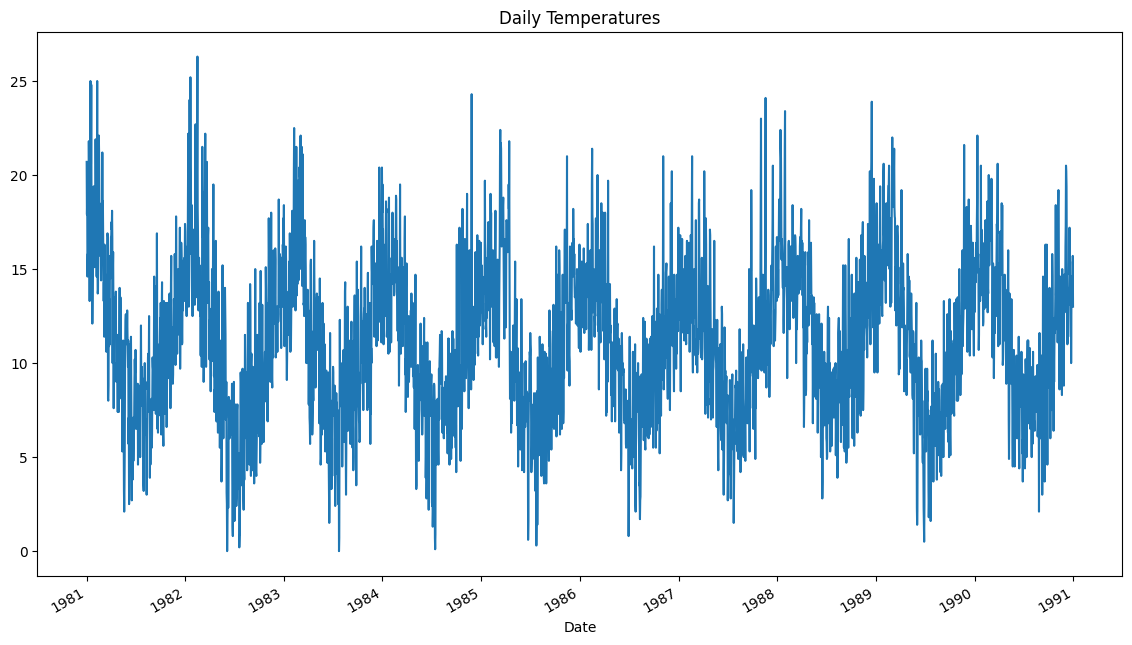

In [1]:
# Import data
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = 'https://raw.githubusercontent.com/selva86/datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
series = df.loc[:, 'Temp'].values
df.plot(title='Daily Temperatures', figsize=(14,8), legend=None);

In [2]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(series)

KPSS Statistic: 0.05570612670427435
p-value: 0.1
num lags: 36
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/var/folders/tj/cfj9qmvs7150dnbbhjnzz1tw0000gq/T/ipykernel_36900/1203535018.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


## 3. How to interpret KPSS test results

The output of the KPSS test contains 4 things:

- The KPSS statistic
- p-value
- Number of lags used by the test
- Critical values

In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. 

That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

By default, the statsmodels kpss() uses the ‘legacy’ method. In legacy method, int(12 * (n / 100)**(1 / 4)) number of lags is included, where n is the length of the series.

## 4. How is KPSS test different from ADF test

A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’.

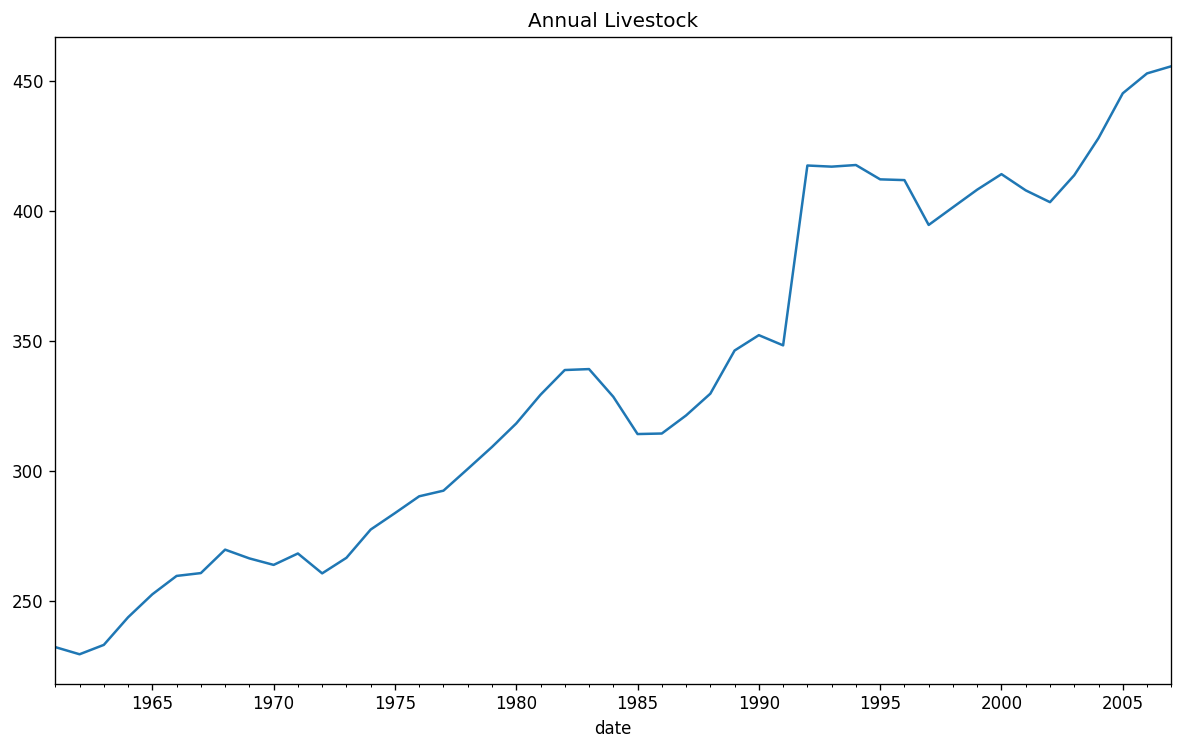

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

path = 'https://raw.githubusercontent.com/selva86/datasets/master/livestock.csv'
df = pd.read_csv(path, parse_dates=['date'], index_col='date')
fig, axes = plt.subplots(1,1, dpi=120)
df.plot(title='Annual Livestock', figsize=(12,7), legend=None, ax=axes);

In [4]:
# KPSS test: stationarity around a trend
series = df.loc[:, 'value'].values
kpss_test(series)

KPSS Statistic: 1.026377056837458
p-value: 0.01
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/var/folders/tj/cfj9qmvs7150dnbbhjnzz1tw0000gq/T/ipykernel_36900/1203535018.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


## 5. KPSS test around a deterministic trend

In KPSS test, to turn ON the stationarity testing around a trend, you need to explicitly pass the regression='ct' parameter to the kpss.

In [5]:
kpss_test(series, regression='ct')

KPSS Statistic: 0.06679313949829183
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


/var/folders/tj/cfj9qmvs7150dnbbhjnzz1tw0000gq/T/ipykernel_36900/1203535018.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [6]:
# ADF tesrt for comparison

# ADF test on random numbers
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

series = df.loc[:, 'value'].values
adf_test(series)

ADF Statistic: -0.23838372529910104
p-value: 0.9337890318823666
Critial Values:
   1%, -3.5812576580093696
Critial Values:
   5%, -2.9267849124681518
Critial Values:
   10%, -2.6015409829867675
